<div style="background-color: darkslategray; color: white; padding: 15px; border-radius: 8px;">
    <center><h1 style="font-family: Arial, sans-serif;">Title</h1></center>
    <center><h3 style="font-family: Arial, sans-serif;">Machine Learning Operations Project - EDA and Preprocessing</h3></center>
</div>

**<h3>Table of Contents</h3>**
* [1. Environment Setup](#1-environment-setup)
    * [1.1 Import Libraries](#11-import-libraries)
    * [1.2 Import Dataset](#12-import-dataset)

* [2. Exploratory Data Analysis](#2-exploratory-data-analysis)
    * [2.1 General Analysis of the dataset](#21-general-analysis-of-the-dataset)
        * [2.1.1 Rows of Missing values](#211-rows-of-missing-values)
        * [2.1.2 Data Coherence](#212-data-coherence)
        * [2.1.3 Duplicate Records](#213-duplicate-records)

    * [2.2 Time-Based Variables](#22-time-based-variables)
        * [2.2.1 First adjustments and overview](#221-first-adjustments-and-overview)
        * [2.2.2 Date Differences](#222-date-differences)
        * [2.2.3 Relationships between the dates](#223-relationships-between-the-dates)
    
    * [2.3 Numerical Variables](#23-numerical-variables)
        * [2.3.1 First adjustments and overview](#231-first-adjustments-and-overview)
        * [2.3.2 Visual analysis](#232-visual-analysis)

    * [2.4 Categorical Variables](#24-categorical-variables)
        * [2.4.1 First adjustments and overview](#241-first-adjustments-and-overview)
        * [2.4.2 Histograms for categorical features](#242-histograms-for-categorical-features)
        * [2.4.3 Converting unknown values to missing](#243-converting-unknown-values-to-missing)

    * [2.5 Multivariate Relationships](#25-multivariate-relationships)

* [3. Creating binary features to handle Missing and Zero Values](#3-creating-binary-features-to-handle-missing-and-zero-values)

* [4. Split the dataset](#4-split-the-dataset)

* [5. Clean and pre-process the dataset](#5-clean-and-pre-process-the-dataset)
    * [5.1 Outlier Treatment](#51-outlier-tratmeant)
    * [5.2 Missing Values Treatment](#52-missing-values-treatment)
    * [5.3 Feature Engineering](#53-feature-engineering)
    * [5.4 Dealing with Categorical variables](#54-dealing-with-categorical-variables)
    * [5.5 Data Scaling](#55-data-scaling)


<div class="alert alert-block alert-success">

# **1.** Environment Setup

<div>

## **1.1** Import Libraries

In [ ]:
import pandas as pd
import os
from dateutil.relativedelta import relativedelta
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# to check the current working directory
os.getcwd()


'C:\\Users\\Rafael\\Desktop\\MLOps\\project'

In [ ]:
# to change the current working directory (if needed)
os.chdir("C:/Users/Rafael/Desktop/MLOps/project")


In [ ]:
# creat the dataframe
df = pd.read_csv("data/01_raw/booking.csv")


In [19]:
# Display the first 5 rows of the DataFrame to get an overview of the data
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


<div class="alert alert-block alert-success">

# **2.** Exploratory Data Analysis

<div>

## **2.1** General Analysis of the dataset

In [20]:
# Show the number of rows and columns in the DataFrame
df.shape

(36285, 17)

In [21]:
# Display a summary of the DataFrame, including data types and non-null counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

| **Column**                | **Description**                                                                                           | **Type**   |
|---------------------------|-----------------------------------------------------------------------------------------------------------|------------|
| `Booking_ID`              | Unique identifier for each booking                                                                        | object     |
| `number of adults`        | Number of adults included in the booking                                                                  | int64      |
| `number of children`      | Number of children included in the booking                                                                | int64      |
| `number of weekend nights`| Number of weekend nights included in the booking                                                          | int64      |
| `number of week nights`   | Number of week nights included in the booking                                                             | int64      |
| `type of meal`            | Type of meal included in the booking                                                                      | object     |
| `car parking space`       | Indicates whether a car parking space was requested or included                                           | int64      |
| `room type`               | Type of room booked                                                                                       | object     |
| `lead time`               | Number of days between the booking date and the arrival date                                              | int64      |
| `market segment type`     | Type of market segment associated with the booking                                                        | object     |
| `repeated`                | Indicates whether the booking is a repeat booking                                                         | int64      |
| `P-C`                     | Number of previous bookings that were canceled by the customer prior to the current booking               | int64      |
| `P-not-C`                 | Number of previous bookings not canceled by the customer prior to the current booking                     | int64      |
| `average price`           | Average price associated with the booking                                                                 | float64    |
| `special requests`        | Number of special requests made by the guest                                                              | int64      |
| `date of reservation`     | Date of the reservation                                                                                   | object     |
| `booking status` (target) | Status of the booking (canceled or not canceled)                                                          | object     |


In [22]:
# Show summary statistics for categorical columns, transposed for easier reading
df.describe(include="object").T

,count,unique,top,freq
Booking_ID,36285,36285,INN00001,1
type of meal,36285,4,Meal Plan 1,27842
room type,36285,7,Room_Type 1,28138
market segment type,36285,5,Online,23221
date of reservation,36285,553,10/13/2018,254
booking status,36285,2,Not_Canceled,24396


In [23]:
# Show summary statistics for numerical columns
df.describe(exclude="object").T

,count,mean,std,min,25%,50%,75%,max
number of adults,36285.0,1.844839,0.518813,0.0,2.0,2.00,2.0,4.0
number of children,36285.0,0.105360,0.402704,0.0,0.0,0.00,0.0,10.0
number of weekend nights,36285.0,0.810693,0.870590,0.0,0.0,1.00,2.0,7.0
number of week nights,36285.0,2.204602,1.410946,0.0,1.0,2.00,3.0,17.0
car parking space,36285.0,0.030977,0.173258,0.0,0.0,0.00,0.0,1.0
lead time,36285.0,85.239851,85.938796,0.0,17.0,57.00,126.0,443.0
repeated,36285.0,0.025630,0.158032,0.0,0.0,0.00,0.0,1.0
P-C,36285.0,0.023343,0.368281,0.0,0.0,0.00,0.0,13.0
P-not-C,36285.0,0.153369,1.753931,0.0,0.0,0.00,0.0,58.0
average price,36285.0,103.421636,35.086469,0.0,80.3,99.45,120.0,540.0


In [24]:
# Loop through each feature
for column in df.columns:
    unique_vals = df[column].unique()
    unique_count = len(unique_vals)

    print(f"\n--- {column} ---")
    
    # If there are more than 15 unique values, print the count
    if unique_count > 15:
        print(f"Number of unique values: {unique_count}")
    else:
        print(unique_vals)


--- Booking_ID ---
Number of unique values: 36285

--- number of adults ---
[1 2 3 0 4]

--- number of children ---
[ 1  0  2  3 10  9]

--- number of weekend nights ---
[2 1 0 4 3 6 5 7]

--- number of week nights ---
Number of unique values: 18

--- type of meal ---
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']

--- car parking space ---
[0 1]

--- room type ---
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']

--- lead time ---
Number of unique values: 352

--- market segment type ---
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']

--- repeated ---
[0 1]

--- P-C ---
[ 0  3  1  2 11  4  5 13  6]

--- P-not-C ---
Number of unique values: 59

--- average price ---
Number of unique values: 3930

--- special requests ---
[0 1 3 2 4 5]

--- date of reservation ---
Number of unique values: 553

--- booking status ---
['Not_Canceled' 'Canceled']


car parking space should be bin

repeated should be bin

In [ ]:
# to correct the data types

df["car parking space"] = df["car parking space"].astype(bool)
df["repeated"] = df["repeated"].astype(bool)

In [28]:
# to check the altered data types
df.dtypes[["car parking space", "repeated"]]

car parking space    bool
repeated             bool
dtype: object

In [14]:
df['market segment type'].value_counts()


market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

probabily put this part (about the date feature) in another spot

In [39]:
def convert_days_to_years_months_days(days):
    """
    Convert a number of days into an approximate (years, months, days) format.

    Parameters:
    - days (int or float): The total number of days to be converted.

    Returns:
    - tuple: A tuple (years, months, days), where:
        - years (int): The approximate number of years.
        - months (int): The approximate number of months.
        - days (int): The remaining days after calculating years and months.
    """

    years = days // 365.25
    remaining_days = days % 365.25
    months = remaining_days // 30.44
    days = remaining_days % 30.44
    return int(years), int(months), int(round(days))

In [41]:
def datetime_statistics_optimized(df, date_column):
    """
    Generate detailed statistics for a datetime column, including range, mean, median, 
    and standard deviation, with dates displayed in string format (YYYY-MM-DD).

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the datetime column.
    - date_column (str): The name of the datetime column to analyze.

    Returns:
    - dict: A dictionary containing the following statistics:
        - 'Earliest Date': The earliest date in the column.
        - 'Latest Date': The latest date in the column.
        - 'Range of Dates': The difference between the earliest and latest dates in years, months, and days.
        - 'Number of Records': The count of non-missing values in the column.
        - 'Number of Missing Values': The count of missing (NaT) values in the column.
        - 'Distinct Values': The number of unique dates in the column.
        - 'Mean Date': The average date in the column.
        - 'Median Date': The median date in the column.
        - 'Standard Deviation (approx.)': The standard deviation of dates, expressed as years, months, and days.
        - 'Most Frequent Date': The most common date in the column.

    Notes:
    - Invalid datetime entries are coerced to NaT.
    - The range and standard deviation are approximations, using common calendar assumptions 
      (e.g., 365.25 days per year, 30.44 days per month).
    """

    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')  
    
    # Calculate basic statistics
    earliest_date = df[date_column].min()
    latest_date = df[date_column].max()
    
    # Calculate range in years, months, and days
    if pd.notna(earliest_date) and pd.notna(latest_date):
        date_range = relativedelta(latest_date, earliest_date)
        range_str = f"{date_range.years} years, {date_range.months} months, {date_range.days} days"
    else:
        range_str = "N/A"
    
    # Standard deviation in days, then converted to (years, months, days)
    std_dev_days = (df[date_column] - df[date_column].mean()).dt.days.std()
    std_years, std_months, std_days = convert_days_to_years_months_days(std_dev_days)
    std_dev_str = f"{std_years} years, {std_months} months, {std_days} days"
    
    # Final statistics
    stats = {
        'Earliest Date': earliest_date,
        'Latest Date': latest_date,
        'Range of Dates': range_str,
        'Number of Records': df[date_column].count(),
        'Number of Missing Values': df[date_column].isna().sum(),
        'Distinct Values': df[date_column].nunique(),
        'Mean Date': df[date_column].mean(),
        'Median Date': df[date_column].median(),
        'Standard Deviation (approx.)': std_dev_str,
        'Most Frequent Date': df[date_column].mode()[0] if not df[date_column].mode().empty else 'N/A'
    }

    for key in ['Earliest Date', 'Latest Date', 'Mean Date', 'Median Date', 'Most Frequent Date']:
        if pd.notna(stats[key]):
            stats[key] = stats[key].strftime('%Y-%m-%d')

    return stats

In [ ]:
# some statistics for date of reservation
df['date of reservation'].value_counts()  #need to turn this into a datetime object

col='date of reservation'
print(f"Statistics for {col}:")

stats = datetime_statistics_optimized(df, col)
    
for stat, value in stats.items():
    print(f"{stat}: {value}")
    
print("\n")


Statistics for date of reservation:
Earliest Date: 2015-10-02
Latest Date: 2018-12-31
Range of Dates: 3 years, 2 months, 29 days
Number of Records: 36248
Number of Missing Values: 37
Distinct Values: 552
Mean Date: 2018-05-24
Median Date: 2018-06-12
Standard Deviation (approx.): 0 years, 4 months, 18 days
Most Frequent Date: 2018-10-13




In [16]:
df['booking status'].value_counts()


booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64

In [17]:
df['type of meal'].value_counts()

type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64

In [18]:
df['room type'].value_counts()

room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

### **2.1.1** Missing and invalid values

In [45]:
# simple analyse of missing or invalid values
resum = pd.DataFrame({
    "isnull()": df.isnull().sum(),
    "isna()": df.isna().sum(),
    '"" (empty string)': (df == "").sum(),
    "'na'/etc (text)": df.apply(lambda x: x.astype(str).str.lower().isin(["na", "n/a", "null", "none"]).sum())
})

resum["% Total"] = (resum.max(axis=1) / len(df) * 100).round(2)

resum = resum[resum.max(axis=1) > 0]  # show only columns with missing values
resum


,isnull(),isna(),""""" (empty string)",'na'/etc (text),% Total
date of reservation,37,37,0,0,0.1


The only missing/ invalid values that we obsrverd are present in 'date of reservation'

In [46]:
# Condições para identificar linhas inválidas
conditions = (
    df.isnull() |
    df.isna()   |
    (df == "")  |
    df.apply(lambda x: x.astype(str).str.lower().isin(["na", "n/a", "null", "none"]))
)

invalide_lines = df[conditions.any(axis=1)]

print(f"Number of lines with at least one invalid number: {len(invalide_lines)}")
invalide_lines.head()


Number of lines with at least one invalid number: 37


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
2626,INN02627,2,0,1,5,Meal Plan 1,False,Room_Type 1,104,Online,True,1,0,61.43,0,NaT,Canceled
3677,INN03678,1,0,1,3,Meal Plan 1,False,Room_Type 1,21,Online,False,0,0,102.05,0,NaT,Canceled
5600,INN05601,2,0,1,3,Meal Plan 1,False,Room_Type 1,24,Offline,False,0,0,45.50,0,NaT,Not_Canceled
6343,INN06344,1,0,1,1,Meal Plan 1,False,Room_Type 1,117,Offline,False,0,0,76.00,0,NaT,Not_Canceled
7648,INN07649,2,1,1,5,Meal Plan 1,False,Room_Type 1,35,Online,False,0,0,98.10,1,NaT,Canceled


NOTE: REMOVE THEM, REPRESENTS ONLY 0.1% OF TOTAL


### **2.1.2** Duplicates

In [31]:
num_duplicates = df.duplicated().sum()
num_duplicates

0

Our data set does not have any duplicate value

### **2.1.3** Visual Analysis and Outliers

Detected discrete variables: ['number of adults', 'number of children', 'number of weekend nights', 'type of meal', 'car parking space', 'room type', 'market segment type', 'repeated', 'P-C', 'special requests', 'booking status']


C:\Users\Rafael\AppData\Local\Temp\ipykernel_16468\3144746902.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2")
C:\Users\Rafael\AppData\Local\Temp\ipykernel_16468\3144746902.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2")
C:\Users\Rafael\AppData\Local\Temp\ipykernel_16468\3144746902.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2")
C:\Users\Rafael\AppData\Local\Temp\ipykernel_16468\3144746902.py:21: FutureWarning: 


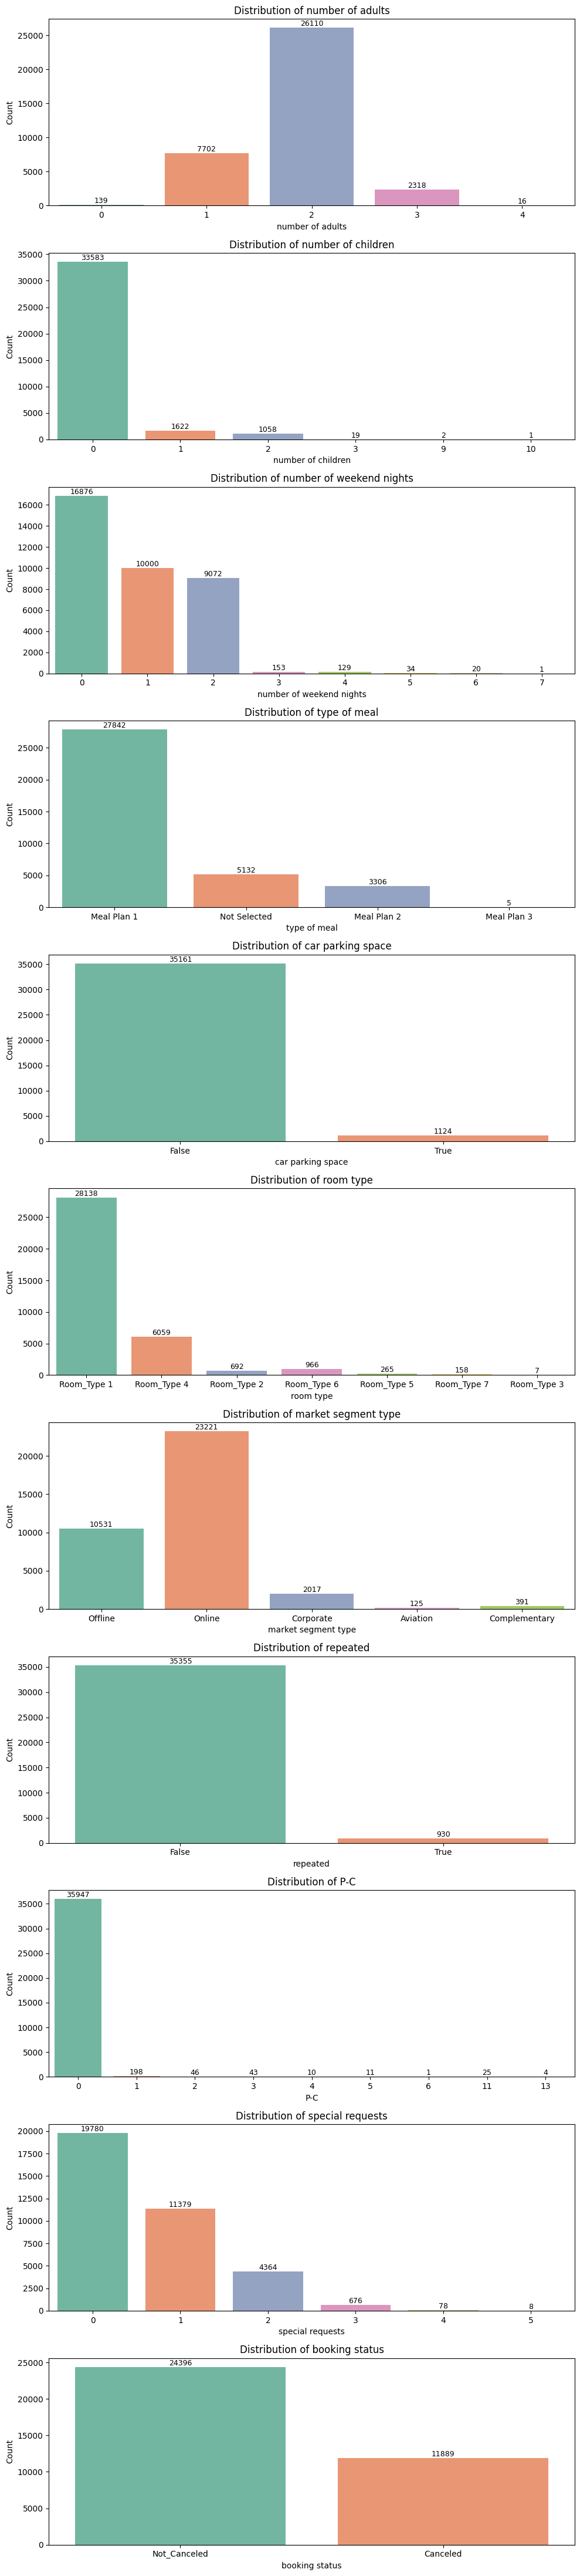

In [ ]:
def plot_discrete_features(df, max_unique=10):
    """
    Plot countplots with value labels for discrete features.
    
    Args:
        df (pd.DataFrame): DataFrame to analyze.
        max_unique (int): Maximum number of unique values to consider a column discrete.
    """
    discrete_cols = [col for col in df.columns if df[col].nunique() <= max_unique and df[col].dtype != "float64"]

    print(f"Detected discrete variables: {discrete_cols}")

    n = len(discrete_cols)
    plt.figure(figsize=(10, 4 * n))

    for i, col in enumerate(discrete_cols, 1):
        plt.subplot(n, 1, i)
        ax = sns.countplot(x=col, data=df, palette="Set2")

        # Add count labels on top of each bar
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=9)

        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.tight_layout()

    plt.show()
plot_discrete_features(df)

- **`number of adults`**: Values 0 and 4 are clearly outliers. It would be appropriate to create a new category, `"Other values"`, grouping these together, and convert the feature to categorical.

- **`number of children`**: We could either group values 3, 9, and 10 into a new `"Other"` category, or simply remove those entries due to their rarity.

- **`number of weekend nights`**: Consider creating an `"Other"` category to group all values from 3 onwards.

- **`type of meal`**: Remove category 3, as it appears to be a clear outlier.

- **`car parking space`**: This feature is highly imbalanced and might not provide useful information. Consider dropping it.

- **`room type`**: Create an `"Other"` category to group rare classes such as 2, 3, 5, 6, and 7.

- **`market segment type`**: Group `"Aviation"` and `"Complementary"` into a new `"Other"` category.

- **`repeated`**: This feature appears highly imbalanced and might be of limited use. Consider removing it.

- **`P-C`**: Completely uninformative — recommend dropping it.

- **`special requests`**: Group values 3 and above into a new category: `"3 or more"`.

- **`booking status`**: This feature looks well balanced and useful — no action needed.


In [53]:
# Function to flag uncommon or rare values based on exploratory analysis
def flag_uncommon_values(df):
    return pd.DataFrame({
        "unusual_adults": df["number of adults"].isin([0, 4]),
        "unusual_children": df["number of children"].isin([3, 9, 10]),
        "unusual_weekend_nights": df["number of weekend nights"] >= 3,
        "unusual_meal": df["type of meal"] == "Meal Plan 3",
        "unusual_parking": df["car parking space"] == True,  # Most are False
        "unusual_room": df["room type"].isin(["Room Type 2", "Room Type 3", "Room Type 5", "Room Type 6", "Room Type 7"]),
        "unusual_segment": df["market segment type"].isin(["Aviation", "Complementary"]),
        "unusual_repeated": df["repeated"] == True,
        "unusual_pc": df["P-C"] > 0,
        "unusual_requests": df["special requests"] >= 3
    })

# Apply flags
unusual_flags = flag_uncommon_values(df)

# Count how many unusual conditions each row meets
unusual_flags["unusual_count"] = unusual_flags.sum(axis=1)

# Filter rows with 3 or more uncommon values
suspect_rows_1 = df[unusual_flags["unusual_count"] >= 3]

# Display results
print(f"Number of rows with 3 or more uncommon values: {len(suspect_rows_1)}")

# Filter rows with 4 or more uncommon values
suspect_rows_2 = df[unusual_flags["unusual_count"] >= 4]

# Display results
print(f"Number of rows with 4 or more uncommon values: {len(suspect_rows_2)}")


Number of rows with 3 or more uncommon values: 96
Number of rows with 4 or more uncommon values: 9


this lines are possible outliers

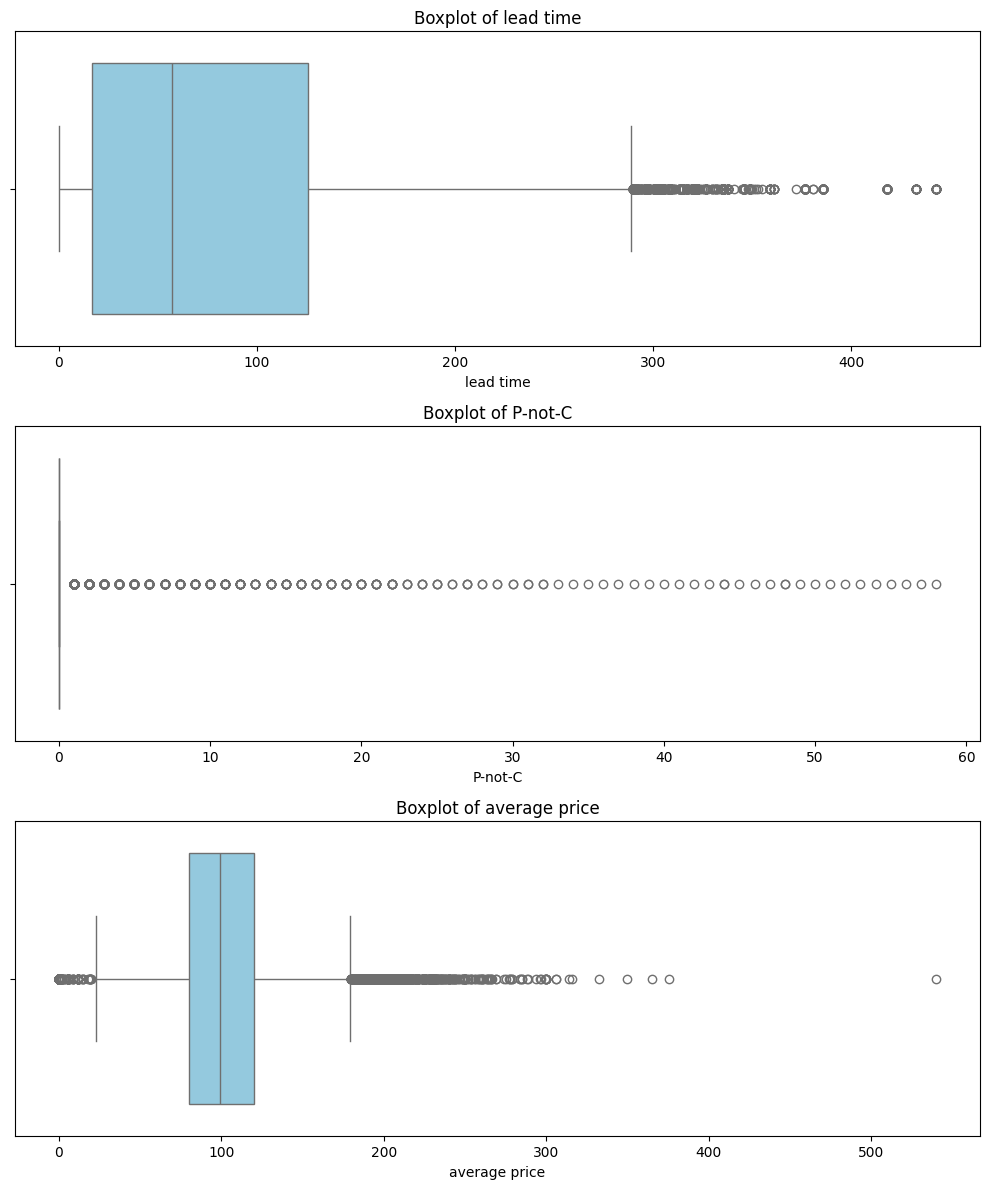

In [ ]:
# Analyze the distribution of lead time, P-not-C, and average price
cols_to_plot = ["lead time", "P-not-C", "average price"]

plt.figure(figsize=(10, 4 * len(cols_to_plot)))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(len(cols_to_plot), 1, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()

plt.show()


In [56]:
def detect_outliers_iqr(df, cols):
    """
    Detect outliers using the IQR method.
    Returns a DataFrame with outlier counts and percentages per column.
    
    Args:
        df (pd.DataFrame): The dataset
        cols (list): List of numerical columns to analyze
    """
    outlier_info = []

    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        count = len(outliers)
        percent = round((count / len(df)) * 100, 2)

        outlier_info.append({
            "Feature": col,
            "Q1": Q1,
            "Q3": Q3,
            "IQR": IQR,
            "Lower Bound": lower_bound,
            "Upper Bound": upper_bound,
            "Outliers": count,
            "Percent (%)": percent
        })

    return pd.DataFrame(outlier_info)
# 
numerical_cols = ["lead time", "P-not-C", "average price"]
iqr_results = detect_outliers_iqr(df, numerical_cols)
print(iqr_results)


         Feature    Q1     Q3    IQR  Lower Bound  Upper Bound  Outliers  \
0      lead time  17.0  126.0  109.0      -146.50       289.50      1332   
1        P-not-C   0.0    0.0    0.0         0.00         0.00       812   
2  average price  80.3  120.0   39.7        20.75       179.55      1696   

   Percent (%)  
0         3.67  
1         2.24  
2         4.67  


"conclusions"

### **2.1.4** Correlations between all features and the target variable

#### **2.1.4.1** Numerical vs target

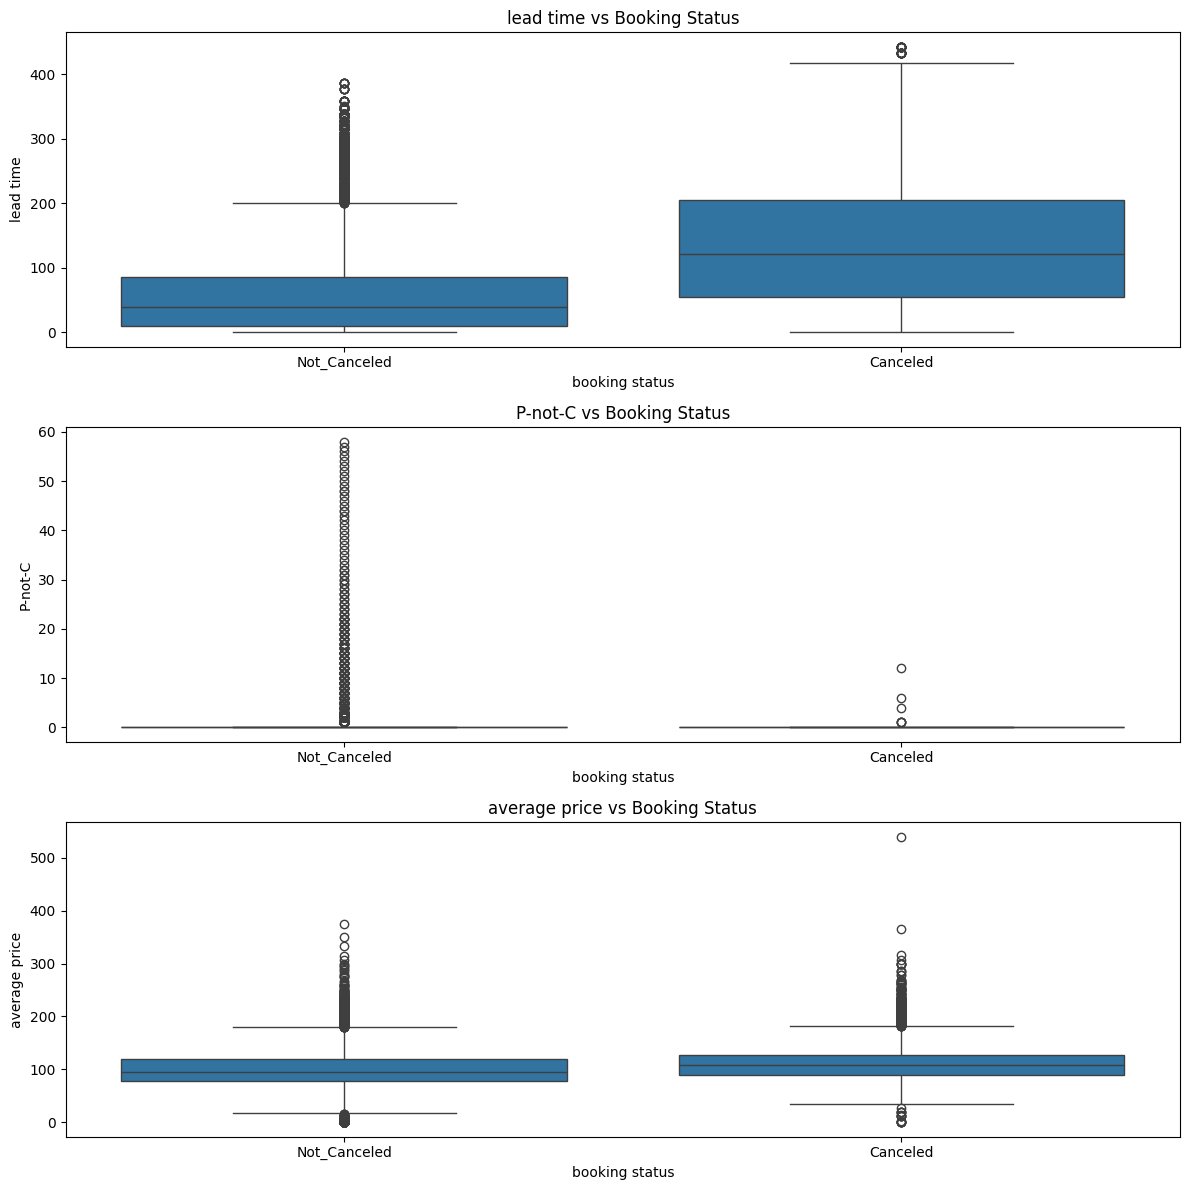

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ["lead time", "P-not-C", "average price"]
plt.figure(figsize=(12, 4 * len(numeric_cols)))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x="booking status", y=col, data=df)
    plt.title(f"{col} vs Booking Status")
    plt.tight_layout()


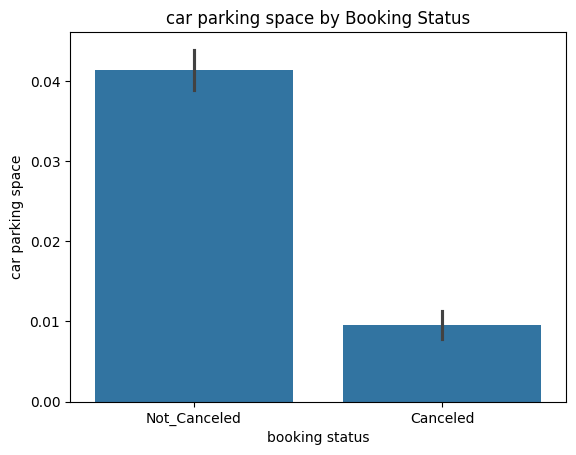

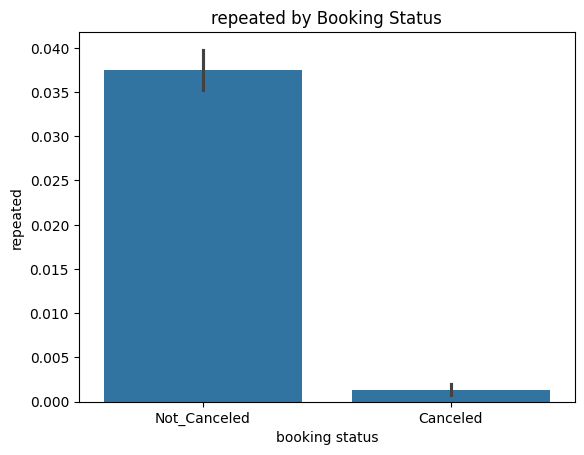

In [58]:
binary_cols = ["car parking space", "repeated"]
for col in binary_cols:
    sns.barplot(x="booking status", y=col, data=df)
    plt.title(f"{col} by Booking Status")
    plt.show()


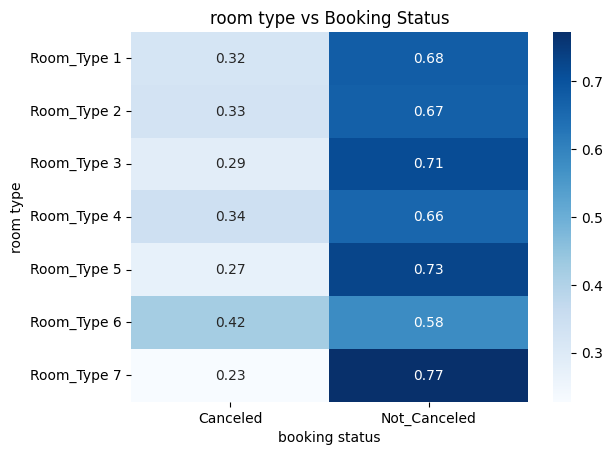

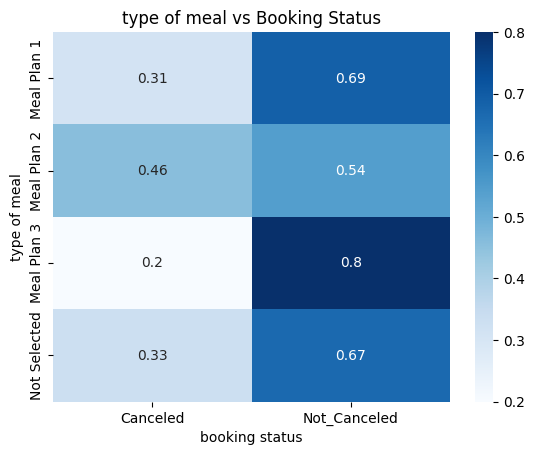

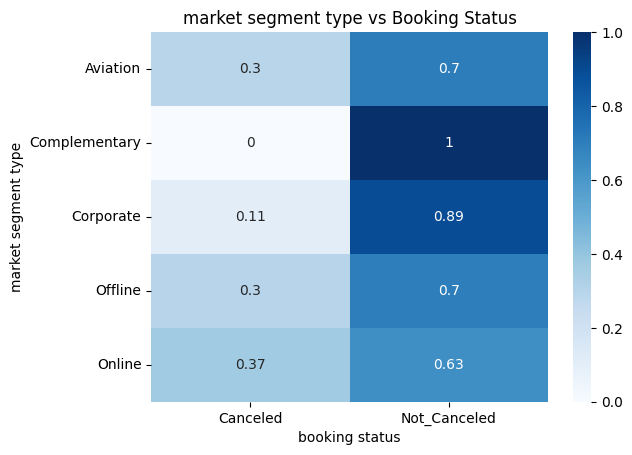

In [59]:
import pandas as pd
import seaborn as sns

cat_cols = ["room type", "type of meal", "market segment type"]
for col in cat_cols:
    ct = pd.crosstab(df[col], df["booking status"], normalize='index')
    sns.heatmap(ct, annot=True, cmap="Blues")
    plt.title(f"{col} vs Booking Status")
    plt.show()


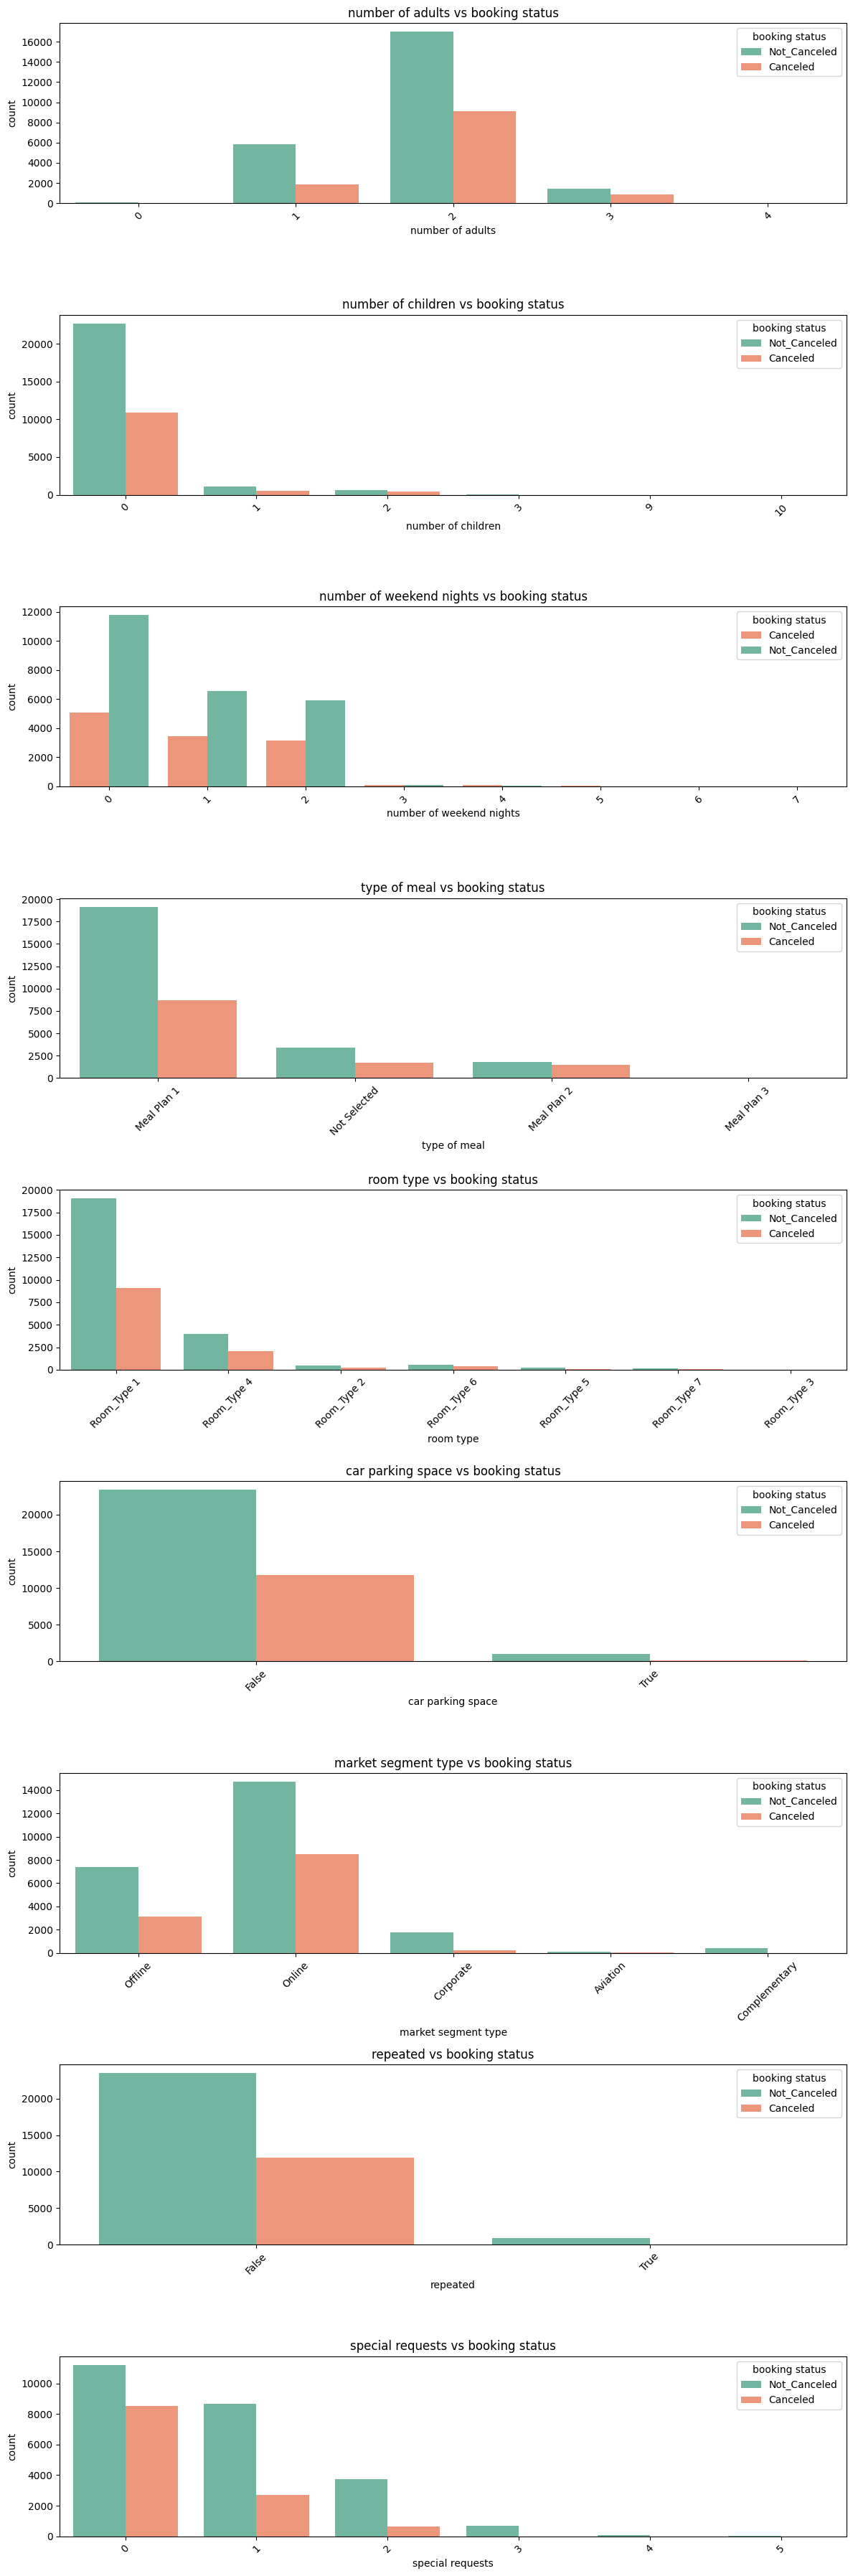

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_discrete_vs_target(df, discrete_cols, target_col="booking status"):
    """
    Plots countplots for discrete variables with fixed colors for target classes.
    """
    # Set consistent colors for each class
    fixed_palette = {"Canceled": "#FF8C69", "Not_Canceled": "#66C2A5"}

    n = len(discrete_cols)
    plt.figure(figsize=(12, 4 * n))

    for i, col in enumerate(discrete_cols, 1):
        plt.subplot(n, 1, i)
        ax = sns.countplot(data=df, x=col, hue=target_col, palette=fixed_palette)
        plt.title(f"{col} vs {target_col}")
        plt.xticks(rotation=45)
        plt.tight_layout()

    plt.show()
discrete_cols = [
    "number of adults", "number of children", "number of weekend nights",
    "type of meal", "room type", "car parking space",
    "market segment type", "repeated", "special requests"
]

plot_discrete_vs_target(df, discrete_cols)


some analysis here 
